Explained variance ratios: [0.72962445 0.22850762]
Principal components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
[[ 0.97819301 -0.10924971  0.87080719  0.86106627]
 [-0.10924971  1.00389019 -0.42723904 -0.38252015]
 [ 0.87080719 -0.42723904  1.04618124  0.93698493]
 [ 0.86106627 -0.38252015  0.93698493  0.99858119]]


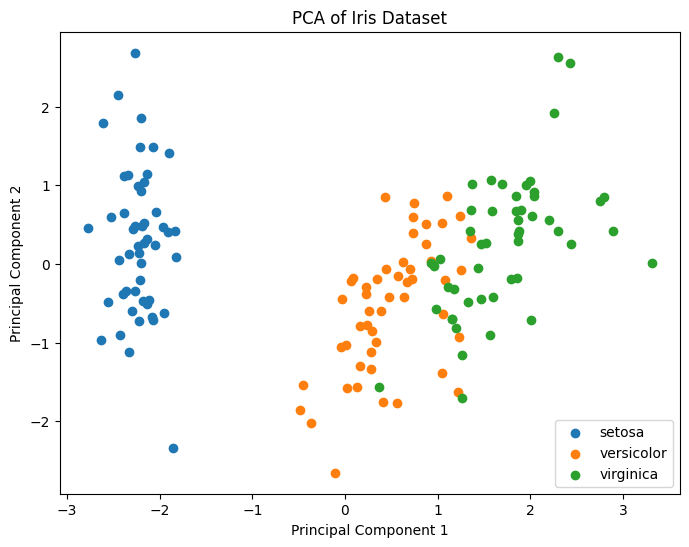

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris)
data = load_iris()
X = data.data      # shape (150, 4)
y = data.target    # labels for plotting

# Standardize the data (important for PCA in real cases)
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Apply PCA: reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Principal components:\n", pca.components_)
cov_matrix = pca.get_covariance()
print(cov_matrix)

# Plot the transformed data in the space of principal components
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=data.target_names[label])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.legend()
plt.show()

In [0]:
# Step1: Compute covariance matrix
# Note: Each column is a feature variable

X_std = StandardScaler().fit_transform(X)
cov_matrix = np.cov(X_std, rowvar=False)

print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [0]:
# Step 2: Compute eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print("\nEigenvalues:\n", eig_vals)
print("\nEigenvectors:\n", eig_vecs)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [0]:
# Step 3: Sort the eigenvalues and eigenvectors from largest to smallest eigenvalue
sorted_indices = np.argsort(eig_vals)[::-1]  # indices for sorting in descending order
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]

print("Sorted Eigenvalues:\n", sorted_eig_vals)
print("\nSorted Eigenvectors:\n", sorted_eig_vecs)

Sorted Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Sorted Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [0]:
# Step 4: Keep the two largest eigenvalues and their associated eigenvectors
top_k = 2
top_eig_vals = sorted_eig_vals[:top_k]
top_eig_vecs = sorted_eig_vecs[:, :top_k]

print("Top 2 Eigenvalues:\n", top_eig_vals)
print("\nAssociated Eigenvectors:\n", top_eig_vecs)

Top 2 Eigenvalues:
 [2.93808505 0.9201649 ]

Associated Eigenvectors:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [0]:
# Step 5: Create a matrix where each column is a top eigenvector scaled by its norm
normalized_eig_vecs = np.zeros_like(top_eig_vecs)
for i in range(top_eig_vecs.shape[1]):
    norm = np.linalg.norm(top_eig_vecs[:, i])
    normalized_eig_vecs[:, i] = top_eig_vecs[:, i] / norm

print("Matrix with normalized eigenvectors (each column scaled by its norm):\n", normalized_eig_vecs)

Matrix with normalized eigenvectors (each column scaled by its norm):
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [0]:
# Step 6: Project the original data onto the normalized top 2 eigenvectors to get the final 2D dataset
projected_data = X_std @ normalized_eig_vecs

# print("Data projected onto top 2 normalized eigenvectors:\n", projected_data)

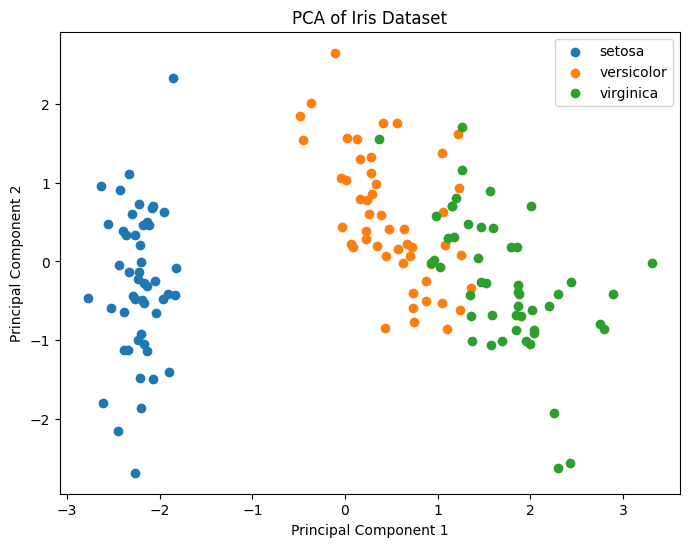

In [0]:
# Plot the transformed data in the space of principal components
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(projected_data[y == label, 0], projected_data[y == label, 1], label=data.target_names[label])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.legend()
plt.show()